##### Import necessary packages

In [ ]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

##### Load ferry passenger data into pandas dataframe and check the head & info.

In [ ]:
ferry_data = pd.read_csv('estonia-passenger-list.csv')
ferry_data.head()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0
3,4,Sweden,JURI,AAVIK,M,53,C,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0


In [ ]:
ferry_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  989 non-null    int64 
 1   Country      989 non-null    object
 2   Firstname    989 non-null    object
 3   Lastname     989 non-null    object
 4   Sex          989 non-null    object
 5   Age          989 non-null    int64 
 6   Category     989 non-null    object
 7   Survived     989 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 61.9+ KB


**No missing cells within the data, so let's try to extract some more information using visualization with matplotlib and seaborn.**

Questions Regarding the Data:


*   Who's more likely to survive the sinking based on data?
*   Is age an indicator for survival?
*   Is gender an indicator for survival?
*   Did the crew aboard have a higher chance of survival than passengers?



In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
mpl.rcParams['figure.titlesize'] = 15
mpl.rcParams['axes.labelsize'] = 13
mpl.rcParams['legend.fontsize'] = 12

##### Is Age a Factor in Survival?

Text(0.5, 1.0, 'Survived by Age')

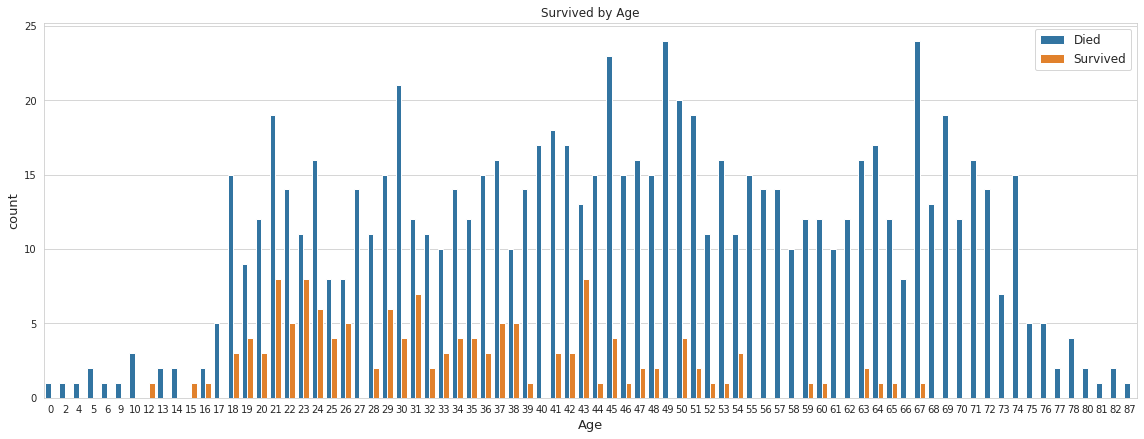

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(x='Age',hue='Survived',data=ferry_data)
plt.legend(['Died','Survived'],loc='upper right')
plt.tight_layout()
plt.title('Survived by Age')

Text(0.5, 1.0, 'Survived by Age')

<Figure size 1152x432 with 0 Axes>

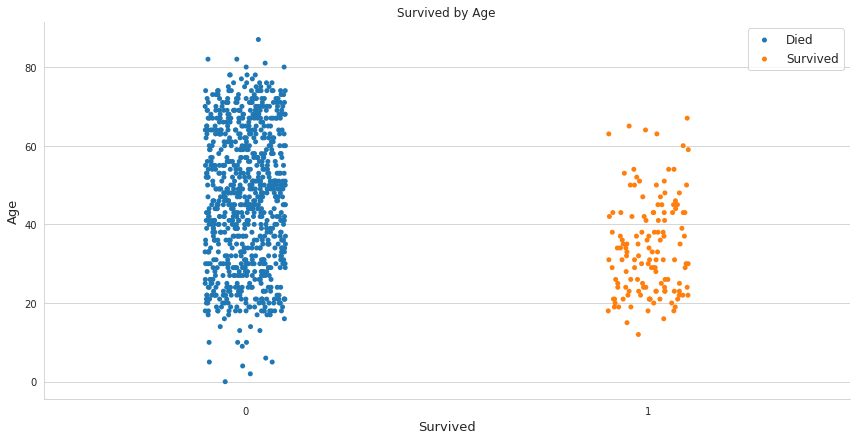

In [ ]:
plt.figure(figsize=(16,6))
sns.catplot(x='Survived',y='Age',data=ferry_data, height=6, aspect=2)
plt.legend(['Died','Survived'],loc='upper right')
plt.tight_layout()
plt.title('Survived by Age')

Text(0.5, 1.0, 'Survived by Age')

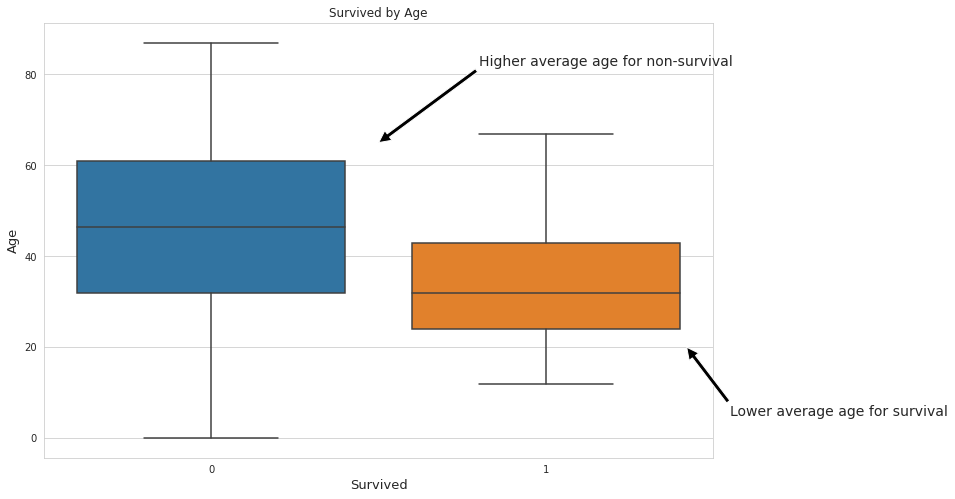

In [ ]:
plt.figure(figsize=(12,8))
boxplt = sns.boxplot(x='Survived', y='Age', data=ferry_data)
boxplt.annotate('Higher average age for non-survival', (0.5,65), xytext=(0.8, 82), arrowprops=dict(facecolor='black',shrink=0.001), size=14)
boxplt.annotate('Lower average age for survival', (1.42, 20), xytext=(1.55,5), arrowprops=dict(facecolor='black',shrink=0.001), size=14)
plt.title('Survived by Age')

In [ ]:
from google.colab import output
# Grab ages by survived status
age_survived = ferry_data[ferry_data['Survived'] == 1]['Age']
age_died = ferry_data[ferry_data['Survived'] == 0]['Age']
# Print the mean and standard deviation of the ages by survived status
print(f"Mean survived age: {np.mean(age_survived)}")
print(f"Mean dead age: {np.mean(age_died)}")
print(f"Standard deviation of survived: {np.std(age_survived)}")
print(f"Standard deviation of dead: {np.std(age_died)}")

Mean survived age: 34.01459854014598
Mean dead age: 46.27347417840375
Standard deviation of survived: 12.112601510401422
Standard deviation of dead: 17.322177720532952


**Here we got the mean and standard deviation for the survived ages and dead ages.**

It turns out that younger passengers and crew members had a better probability at survival than the older passengers which can answer whether or not age had a factor in survival.

##### Is Gender a Factor in Survival?

In [ ]:
# Grab # of male and female passengers, and the # of male and female survived passengers
male = ferry_data[ferry_data['Sex'] == 'M'].count()[0]
female = ferry_data[ferry_data['Sex'] == 'F'].count()[0]
male_survived = ferry_data[(ferry_data['Sex'] == 'M') & (ferry_data['Survived'] == 1)].count()[0]
female_survived = ferry_data[(ferry_data['Sex'] == 'F') & (ferry_data['Survived'] == 1)].count()[0]

# Print out the ratios of the male and female passengers, and the ratios for the male and female survived passengers
print(f"Male Passengers: {male}\nFemale Passengers: {female}\n")
print(f"Male to Female Ratio: {male/female:0.4f}")
print(f"Female to Male Ratio: {female/male:0.4f}\n")
print(f"Men to Female Survived Ratio: {(male_survived / female_survived)*100:0.4f}%")
print(f"Female to Male Survived Ratio: {(female_survived / male_survived)*100:0.4f}%\n")
print(f"Male to Male Survived Ratio: {(male_survived/male)*100:0.4f}%")
print(f"Female to Female Survived Ratio: {(female_survived/female)*100:0.4f}%")

Male Passengers: 503
Female Passengers: 486

Male to Female Ratio: 1.0350
Female to Male Ratio: 0.9662

Men to Female Survived Ratio: 407.4074%
Female to Male Survived Ratio: 24.5455%

Male to Male Survived Ratio: 21.8688%
Female to Female Survived Ratio: 5.5556%


Text(0.5, 1.0, 'Survived by Sex')

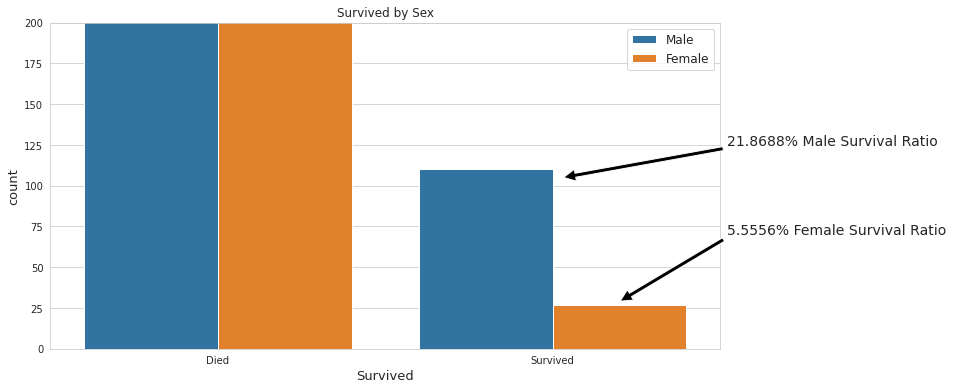

In [ ]:
plt.figure(figsize=(12,6))
cp = sns.countplot(x='Survived',hue='Sex',data=ferry_data)
cp.set_ybound(upper=200)
cp.set_xticklabels(['Died','Survived'])
cp.annotate('5.5556% Female Survival Ratio', (1.20,29), xytext=(1.52,70), arrowprops=dict(facecolor='black', shrink=0.006), size=14)
cp.annotate('21.8688% Male Survival Ratio', (1.03, 105), xytext=(1.52, 125), arrowprops=dict(facecolor='black', shrink=0.006), size=14)
plt.legend(['Male','Female'])
plt.title('Survived by Sex')

There is quite the difference between males and females in terms of survival rates on the MS Estonia. Males had a **21.8688%** survival rate, while females had a **5.5556%** survival rate. This was a starking **16.3132%** difference for survival rates based on gender. So after this analysis, I can confidently say that gender did have a factor on survival based on the differences in survival rates.

##### Did the Crew have an Inherit Edge to Survival?

In [ ]:
crew = ferry_data[ferry_data['Category'] == 'C'].count()[0]
passengers = ferry_data[ferry_data['Category'] == 'P'].count()[0]
crew_survived = ferry_data[(ferry_data['Category'] == 'C') & (ferry_data['Survived'] == 1)].count()[0]
passengers_survived = ferry_data[(ferry_data['Category'] == 'C') & (ferry_data['Survived'] == 1)].count()[0]

print(f"Passengers per (1) Crew Member: {passengers/crew:0.4f}")
print(f"Survived Passengers per (1) Crew Member: {passengers_survived/crew_survived:0.4f}")

Passengers per (1) Crew Member: 4.1244
Survived Passengers per (1) Crew Member: 1.0000


There seems to be a huge difference in ratios when comparing the passengers and the survived group. Crew members had a 4x better chance at surviving compared to passengers.

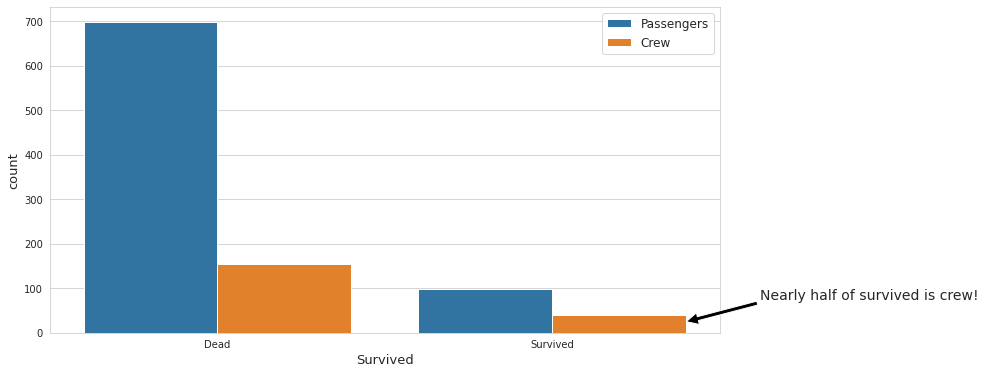

In [ ]:
plt.figure(figsize=(12,6))
cp = sns.countplot(x='Survived',hue='Category',data=ferry_data)
cp.set_xticklabels(['Dead','Survived'])
cp.annotate('Nearly half of survived is crew!', xy=(1.4,25), xytext=(1.62,75), arrowprops=dict(facecolor='black',shrink=0.001), size=14)
plt.legend(['Passengers','Crew'])

In conclusion, surviving passengers and crew members were on average 12 years younger than the average age of the remaining. Gender also plays a huge role, with a 15% advantage in survival rates for males (21.86% for males, 5.55% for females). Lastly the difference in survival rates was significant for crew members and passengers. Crew members had a 4x higher chance at survival than passengers. The original ratio of passengers to crew members was ~4. After the incident, the surviving ratio was 1:1, which means passengers took a 75% cut since 1/4 (if 1 is crew and 4 is passengers).

##### Missing Data?

**No missing data in this dataset!**

##### Grab all object and numerical series and separate them for encoding.

In [ ]:
objects = ferry_data.select_dtypes(include=['object'])
numerical = ferry_data.select_dtypes(exclude=['object'])

In [ ]:
numerical.drop('PassengerId',axis=1,inplace=True)

In [ ]:
objects.drop(['Firstname','Lastname'],axis=1,inplace=True)

In [ ]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Age       989 non-null    int64
 1   Survived  989 non-null    int64
dtypes: int64(2)
memory usage: 15.6 KB


In [ ]:
objects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Country   989 non-null    object
 1   Sex       989 non-null    object
 2   Category  989 non-null    object
dtypes: object(3)
memory usage: 23.3+ KB


In [ ]:
sex = pd.get_dummies(objects['Sex'],drop_first=True)
category = pd.get_dummies(objects['Category'],drop_first=True)

In [ ]:
objects['Country'].unique()

array(['Sweden', 'Estonia', 'Latvia', 'Russia', 'Germany', 'Finland',
       'Great Britain', 'Morocco', 'Denmark', 'France', 'Netherlands',
       'Norway', 'Lithuania', 'Nigeria', 'Canada', 'Belarus'],
      dtype=object)

In [ ]:
objects.drop('Country',axis=1,inplace=True)
objects = pd.concat([sex, category], axis=1)
objects = objects.rename({'M':'Male','P':'Passengers'},axis=1)

In [ ]:
X = pd.concat([objects,numerical.drop('Survived',axis=1)],axis=1)
y = numerical['Survived']

In [ ]:
X.head()

,Male,Passengers,Age
0,1,1,62
1,0,0,22
2,0,0,21
3,1,0,53
4,0,1,55


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
984    0
985    1
986    0
987    0
988    1
Name: Survived, Length: 989, dtype: int64

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Male        989 non-null    uint8
 1   Passengers  989 non-null    uint8
 2   Age         989 non-null    int64
dtypes: int64(1), uint8(2)
memory usage: 9.8 KB


Now we have to split out data into training and testing sets. We can do this using sklearns train_test_split, which does the shuffling and splitting we need.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

Now that we have our data ready for modeling, let's create different models to find the best accuracy!

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#### Logistic Regression

For our first model, we will use no scaling to get a base representation of our data through logistic modeling.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(f"Classification Report: \n\n{classification_report(y_test, predictions)}\n\nConfusion Matrix: \n\n{confusion_matrix(y_test,predictions)}\n\nAccuracy: {accuracy_score(y_test,predictions)*100:0.5f}%")

Classification Report: 

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       175
           1       0.00      0.00      0.00        23

    accuracy                           0.86       198
   macro avg       0.44      0.49      0.46       198
weighted avg       0.78      0.86      0.82       198


Confusion Matrix: 

[[171   4]
 [ 23   0]]

Accuracy: 86.36364%


86.36% accuracy is not bad! Let's see if we can get a better score with a GridSearch.

In [ ]:
params = {'intercept_scaling':[0.1]}
grid = GridSearchCV(LogisticRegression(C=1, tol=0.1, solver='saga', n_jobs=-1, max_iter=2000),params,n_jobs=-1)

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=2000, multi_class='auto',
                                          n_jobs=-1, penalty='l2',
                                          random_state=None, solver='saga',
                                          tol=0.1, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'intercept_scaling': [0.1]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [ ]:
grid.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=0.1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='saga', tol=0.1, verbose=0,
                   warm_start=False)

In [ ]:
grid.best_score_

0.8546134861874055

In [ ]:
predictions = grid.predict(X_test)

In [ ]:
print(f"Classification Report: \n\n{classification_report(y_test, predictions)}\n\nConfusion Matrix: \n\n{confusion_matrix(y_test,predictions)}\n\nAccuracy: {accuracy_score(y_test,predictions)*100:0.5f}%")

Classification Report: 

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       175
           1       0.00      0.00      0.00        23

    accuracy                           0.88       198
   macro avg       0.44      0.50      0.47       198
weighted avg       0.78      0.88      0.83       198


Confusion Matrix: 

[[175   0]
 [ 23   0]]

Accuracy: 88.38384%


88.38384% accuracy with a GridSearch with our data on a logistic model! This is a 2% improvement. Next, let's scale the data and run it through our GridSearch to see if we gain any more accuracy.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(X_test)

In [ ]:
params = {'C':[1,5,10,15,20], 'tol':[0.1,0.01,0.001], 'solver':['newton-cg','saga','lbfgs'], 'penalty':['none','l2']}
grid = GridSearchCV(LogisticRegression(n_jobs=-1,max_iter=2000),params,n_jobs=-1)

In [ ]:
grid.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=2000, multi_class='auto',
                                          n_jobs=-1, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 5, 10, 15, 20], 'penalty': ['none', 'l2'],
                         'solver': ['newton-cg', 'saga', 'lbfgs'],
                         'tol': [0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
grid.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='saga', tol=0.1, verbose=0,
                   warm_start=False)

In [ ]:
grid.best_score_

0.8495661173473449

In [ ]:
predictions = grid.predict(x_test)

In [ ]:
print(f"Classification Report: \n\n{classification_report(y_test, predictions)}\n\nConfusion Matrix: \n\n{confusion_matrix(y_test,predictions)}\n\nAccuracy: {accuracy_score(y_test,predictions)*100:0.5f}%")

Classification Report: 

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       175
           1       0.00      0.00      0.00        23

    accuracy                           0.86       198
   macro avg       0.44      0.49      0.46       198
weighted avg       0.78      0.86      0.82       198


Confusion Matrix: 

[[171   4]
 [ 23   0]]

Accuracy: 86.36364%


Overall we ended up doing the best with no scaling, and a param grid with logistic regression.

#### Naive Bayes Models

First we are going to start with a class, the Gaussian Naive Bayes algorithm.

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
predictions = gnb.fit(X_train, y_train).predict(X_test)

In [ ]:
print(f"Classification Report: \n\n{classification_report(y_test, predictions)}\n\nConfusion Matrix: \n\n{confusion_matrix(y_test,predictions)}\n\nAccuracy: {accuracy_score(y_test,predictions)*100:0.5f}%")

Classification Report: 

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       175
           1       0.25      0.13      0.17        23

    accuracy                           0.85       198
   macro avg       0.57      0.54      0.55       198
weighted avg       0.82      0.85      0.83       198


Confusion Matrix: 

[[166   9]
 [ 20   3]]

Accuracy: 85.35354%


#### Support Vector Machines (SVM)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
y = y.to_numpy()
y = y.reshape(-1, 1)
y = pd.DataFrame(y)
scaled_X = scaler.fit_transform(X)
scaled_y = scaler.fit_transform(y)

In [ ]:
from sklearn.svm import SVC

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, scaled_y, test_size=0.2, random_state=2)

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
predictions = svc.predict(X_test)

In [ ]:
print(f"Classification Report: \n\n{classification_report(y_test, predictions)}\n\nConfusion Matrix: \n\n{confusion_matrix(y_test,predictions)}\n\nAccuracy: {accuracy_score(y_test,predictions)*100:0.5f}%")

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94       175
         1.0       0.00      0.00      0.00        23

    accuracy                           0.88       198
   macro avg       0.44      0.50      0.47       198
weighted avg       0.78      0.88      0.83       198


Confusion Matrix: 

[[175   0]
 [ 23   0]]

Accuracy: 88.38384%


In [ ]:
params = {'C':[1,10,15,20], 'degree':[3,5,7,9], 'kernel':['sigmoid','rbf']}

In [ ]:
grid = GridSearchCV(SVC(), params, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 10, 15, 20], 'degree': [3, 5, 7, 9],
                         'kernel': ['sigmoid', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
grid.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
grid.best_score_

0.8558793089722156

In [ ]:
predictions = grid.predict(X_test)

In [ ]:
print(f"Classification Report: \n\n{classification_report(y_test, predictions)}\n\nConfusion Matrix: \n\n{confusion_matrix(y_test,predictions)}\n\nAccuracy: {accuracy_score(y_test,predictions)*100:0.5f}%")

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94       175
         1.0       0.00      0.00      0.00        23

    accuracy                           0.88       198
   macro avg       0.44      0.50      0.47       198
weighted avg       0.78      0.88      0.83       198


Confusion Matrix: 

[[175   0]
 [ 23   0]]

Accuracy: 88.38384%
